<a href="https://colab.research.google.com/github/purvaad/house-price-prediction-/blob/main/housepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv("housedata.csv")

In [ ]:
df.head()
#df.columns
df.isnull().sum()


Unnamed: 0     0
Id             0
LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-5-1e3e69534e69>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

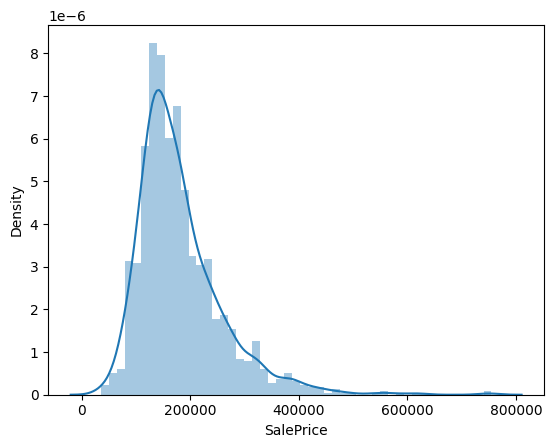

In [ ]:
sb.distplot(df['SalePrice'])

In [ ]:
df=df.drop(['Id'], axis=1)
df=df.drop(['Unnamed: 0'], axis=1)
cols=df.columns

df.head()
print(cols)

Index(['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')


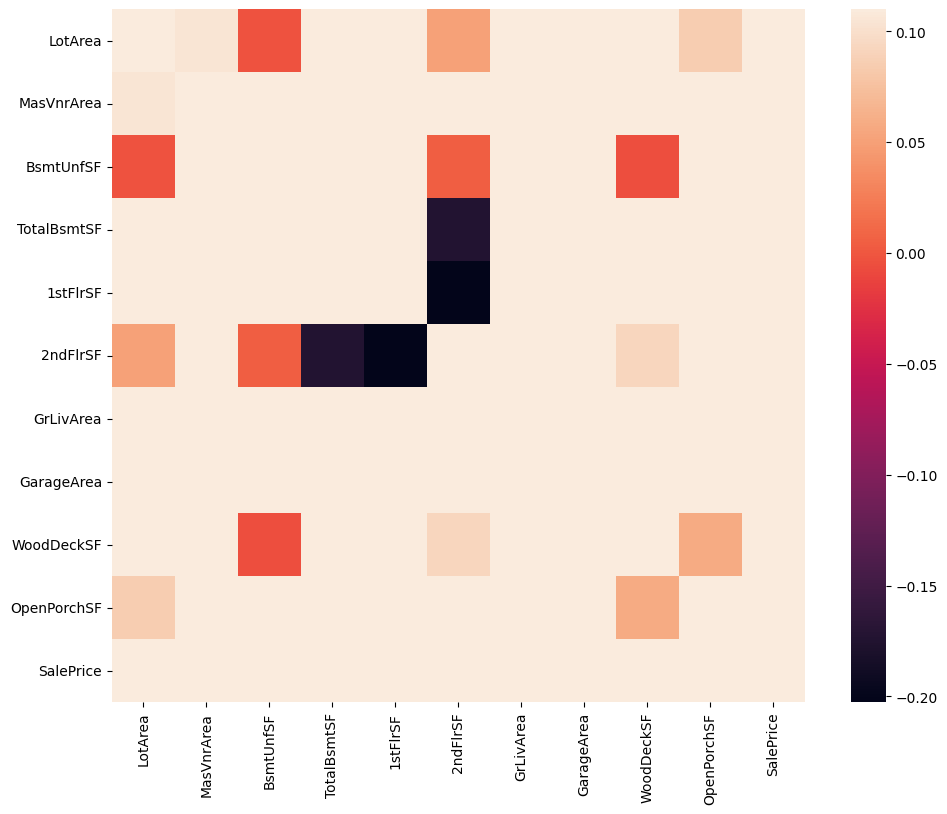

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.11, square=True);

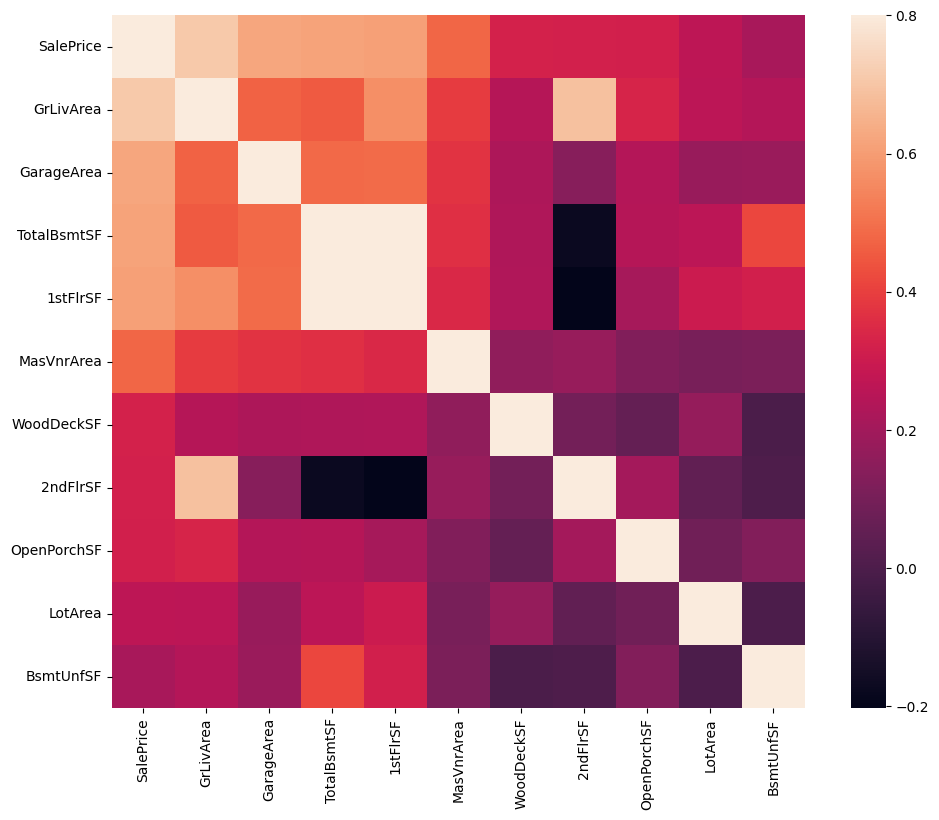

In [ ]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(df[cols].corr(), vmax=.8, square=True);

In [ ]:
df=df.drop(['2ndFlrSF'], axis=1)


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


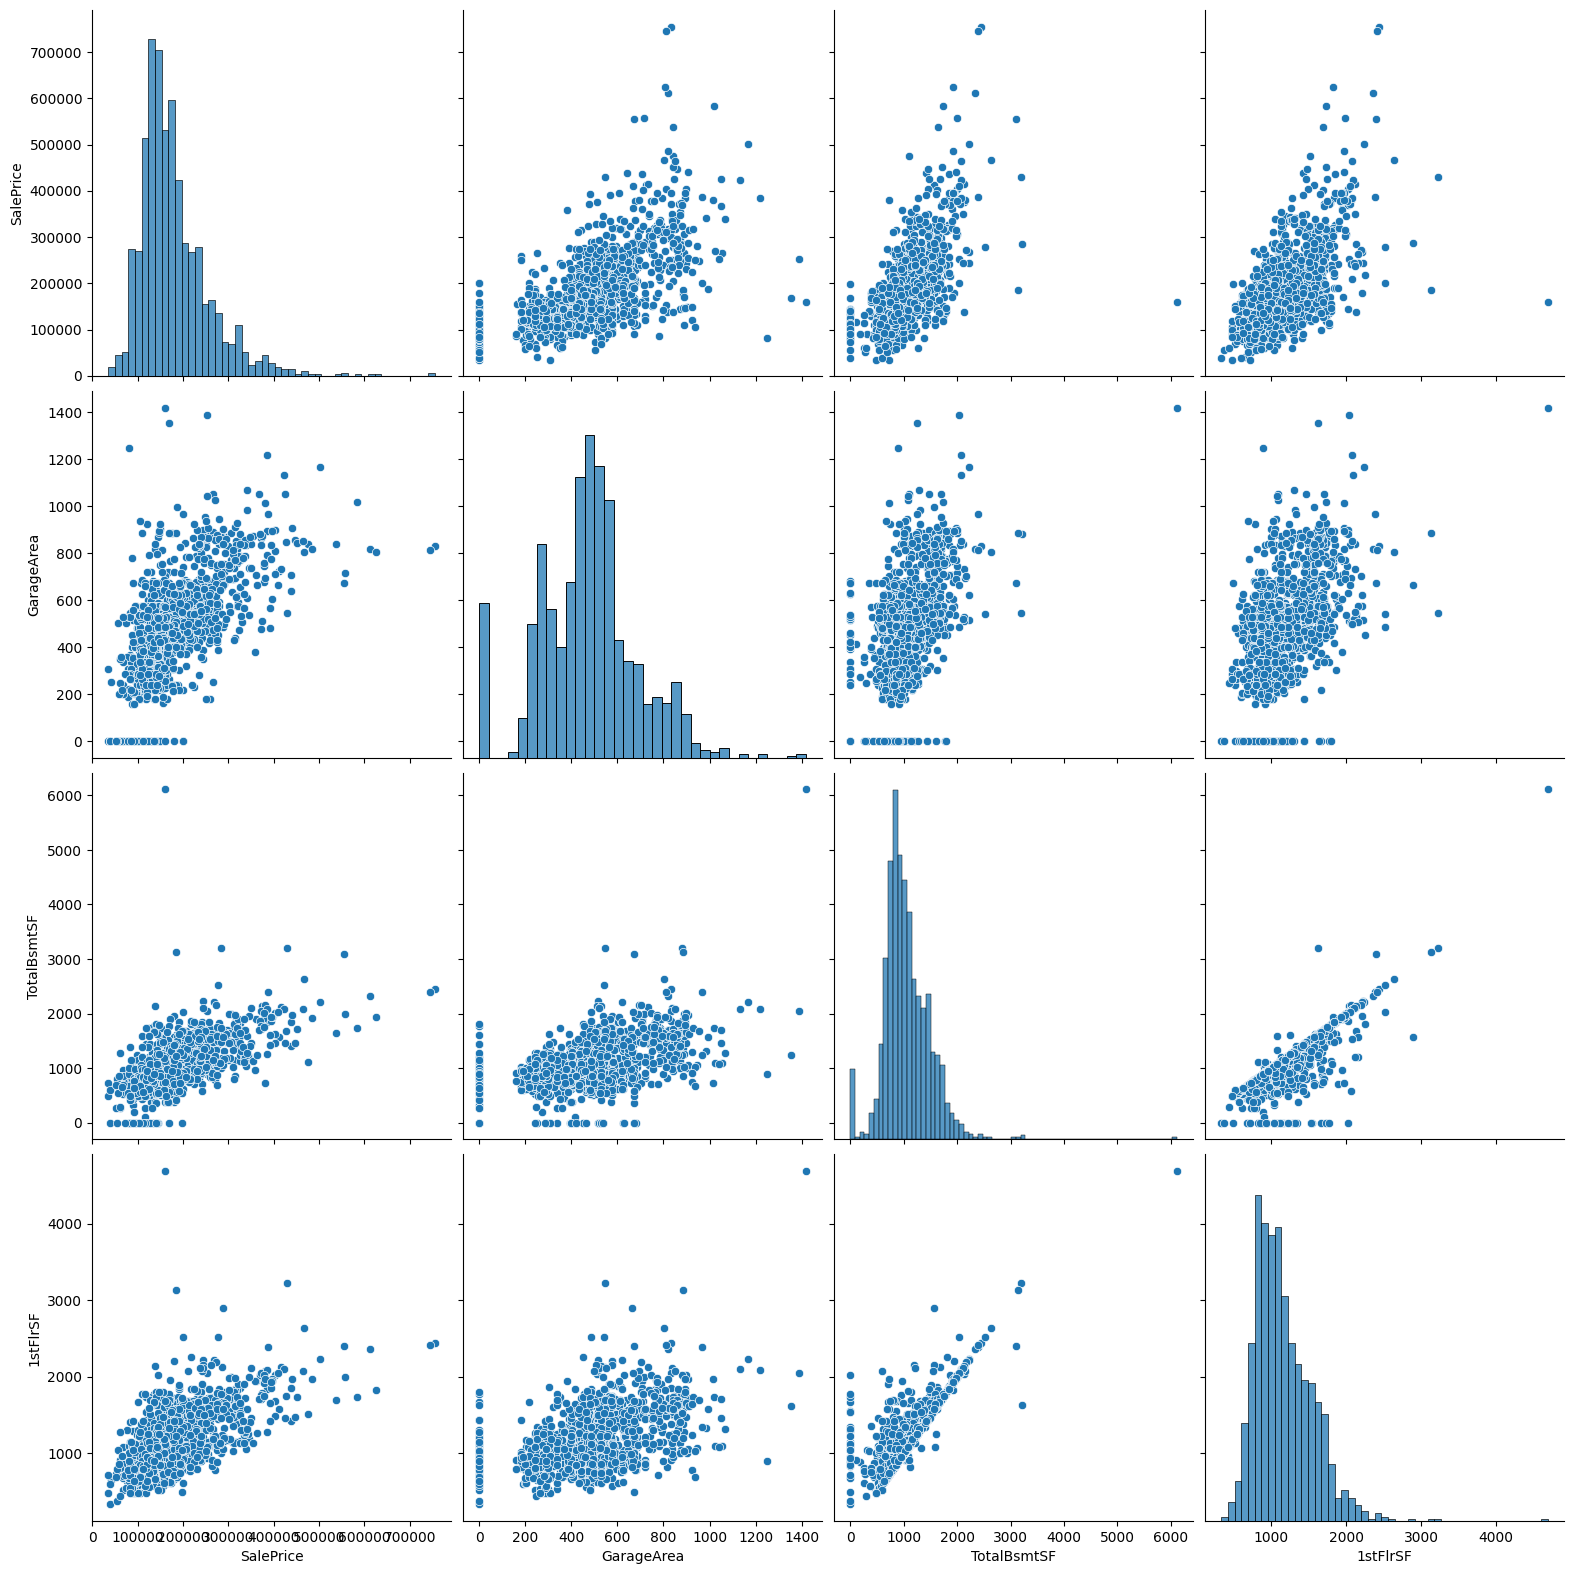

In [ ]:
cols = ['SalePrice', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sb.pairplot(df[cols], size = 4);

In [ ]:
X = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1168, 9)
(292, 9)
(1168,)


In [ ]:
#scaling our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



In [ ]:
x_train = pd.DataFrame(X_train_scaled)
x_test = pd. DataFrame(X_test_scaled)

In [ ]:
#error rate for different k values

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 49880.16189245789
RMSE value for k=  2 is: 43834.16078388599
RMSE value for k=  3 is: 41040.067163166656
RMSE value for k=  4 is: 40272.38362532528
RMSE value for k=  5 is: 38199.064079072974
RMSE value for k=  6 is: 37653.699777697955
RMSE value for k=  7 is: 37723.51778923612
RMSE value for k=  8 is: 37307.01188392542
RMSE value for k=  9 is: 37620.79190814007
RMSE value for k=  10 is: 37319.93242456332


<Axes: >

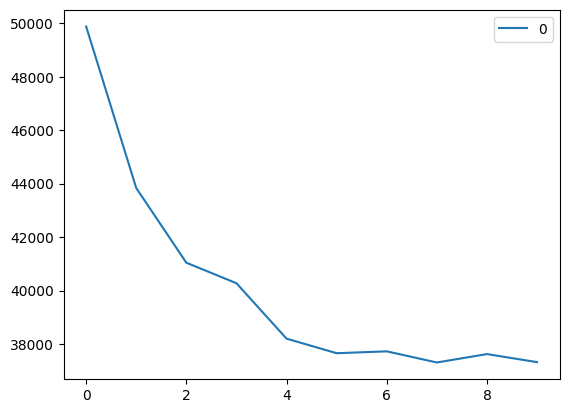

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric


In [ ]:
# 1.1 OLS scaled model
ols2 = LinearRegression()
ols2.fit(x_train, y_train)
ols_yhat2 = ols2.predict(x_test)

print('-------------------------------------------------------------------------------')
print('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat2)))

print('-------------------------------------------------------------------------------')
print('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat2)))



-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.7204198331550135
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.719485097816398


In [ ]:
#training on scaled data
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)

print('R-Squared of KNN model is {}'.format(r2(y_test, y_pred)))
print('evs of Knn model is {}'.format(evs(y_test, y_pred)))



R-Squared of KNN model is 0.7787511150697677
evs of Knn model is 0.7819892777493688


In [ ]:
res=neigh.predict([[14260,350.0,490,1145,2198,836,192,84,0]])
print(res)


[289077.77777778]


In [ ]:
df.head()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,196.0,150,856,856,1710,548,0,61,208500
1,9600,0.0,284,1262,1262,1262,460,298,0,181500
2,11250,162.0,434,920,920,1786,608,0,42,223500
3,9550,0.0,540,756,961,1717,642,0,35,140000
4,14260,350.0,490,1145,1145,2198,836,192,84,250000


In [ ]:
#for mumbai dataset
#https://www.kaggle.com/code/mayurpimpude/mumbai-property-price-prediction